In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [147]:
D = 2
L = int(((D+1)**2-(D+1))/2)+D+1

In [225]:
shifter = np.random.uniform(0.2,3,L)
print(shifter)

[2.08774932 0.93907462 1.11503284 2.27244732 1.78244635 1.79521945]


In [241]:
shifter_2 = np.random.uniform(0.2,1.9,L)
print(shifter_2)

[1.45343327 1.42472919 0.63056835 1.05567514 1.50992326 1.32857026]


In [242]:
def coefficients(theta):
    c = [1]
    for j in range(D):
        c.append(theta[j])
    return np.asarray(c)

def weights(theta):
    coeffs = coefficients(theta)
    matrix = coeffs[:,np.newaxis]@coeffs[np.newaxis,:]
    upper = matrix[np.triu_indices(D+1)]
    upper = upper*shifter*shifter_2
    return upper

def expression(th,basis):
    weight_list = []
    num_matrix = []
    den_matrix = []
    sum_vec = []
    for elem in basis:       
        weight_list.append(weights(elem))
    for (j,elem) in enumerate(basis):
        num_matrix.append(weight_list[j]/(np.sum(weight_list[j])))
        den_matrix.append(weight_list[j])
        sum_vec.append(np.sum(weight_list[j]))
    #print(np.shape(np.asarray(num_matrix)))
    num = weights(th)@np.linalg.inv(np.asarray(num_matrix))
    den = weights(th)@np.linalg.inv(np.asarray(den_matrix))@np.asarray(sum_vec)
    #print(num)
    if np.all(th != np.zeros(D)):
        return np.sum(np.abs(num/den))
    else:
        print("evaluating in 0")
        return np.sum(np.abs(num[1:np.shape(num)[0]]/den))
    
def min_task(basis):
    basis = basis.reshape((L,D))
    ls = np.linspace(-10,10,10)
    theta_mesh = np.vstack(np.meshgrid(ls,ls)).reshape(2,-1).T
    vals = []
    for t in theta_mesh:
        vals.append(expression(t,basis))

    return np.max(vals)

In [252]:
basis = np.random.uniform(-20,20,(L,D))
basis[0][0] = 1
basis[0][1] = 0
th = np.random.uniform(0,0,D)
expression([0,0],basis)

evaluating in 0


52.21896769003252

In [231]:
minimal = minimize(min_task,np.random.uniform(-10,10,L*D))

In [232]:
minimal["fun"]

4.003159174834728

In [233]:
minimal["x"]

array([-0.81944895,  0.45046771,  0.14614824, -0.78954693, -6.84876757,
        8.19657114,  8.0364075 , -1.98398613,  3.18519608,  5.48958868,
       -4.44118129, -6.16101989])

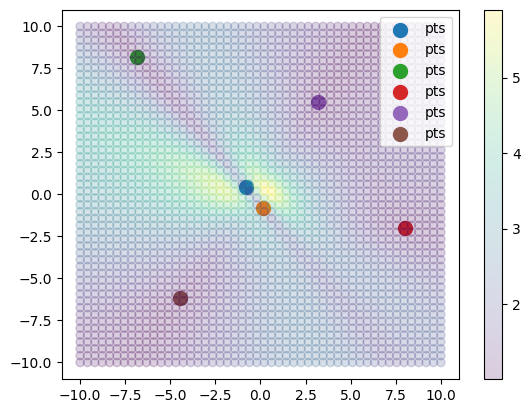

1.0000000000000002


In [243]:
ls = np.linspace(-10,10,50)
theta_mesh = np.vstack(np.meshgrid(ls,ls)).reshape(2,-1).T
basis = minimal["x"].reshape(L,D)
vals = []
for elem in basis:
    plt.scatter(elem[0],elem[1],s=100,label="pts")
for elem in theta_mesh:
    vals.append(expression(elem,basis))
plt.scatter(theta_mesh[:,0],theta_mesh[:,1],c=vals,alpha=0.2)
plt.colorbar()
plt.legend()
plt.show()
np.min(vals)
print(expression(basis[0],basis))

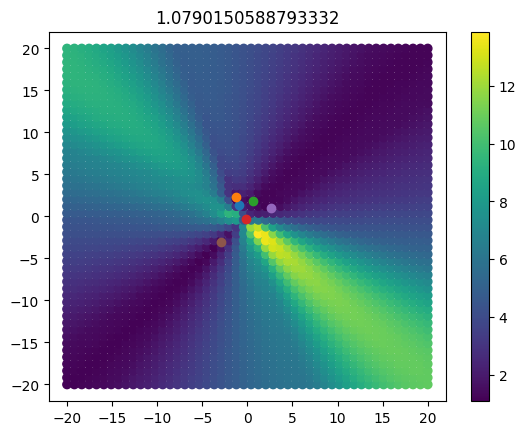

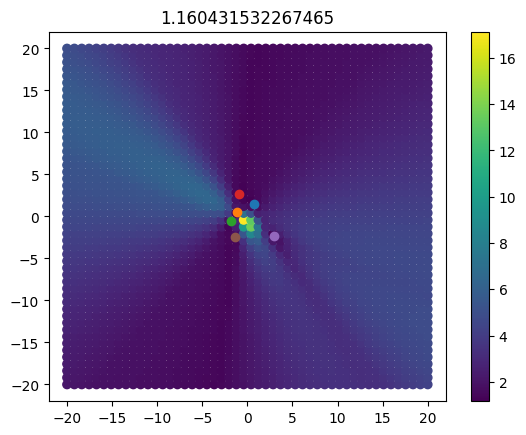

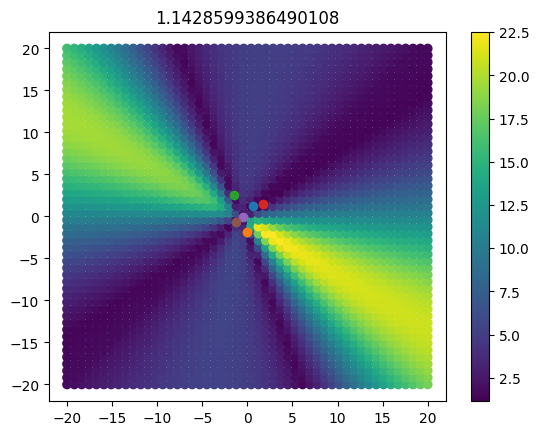

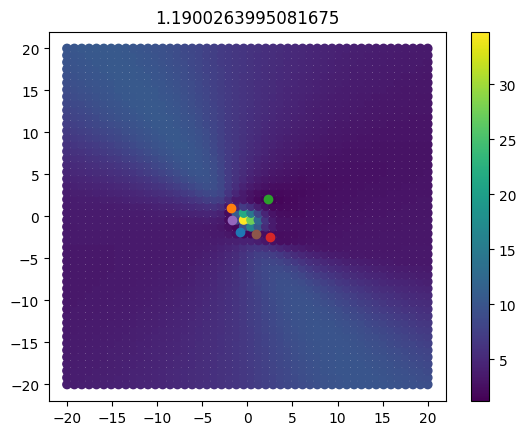

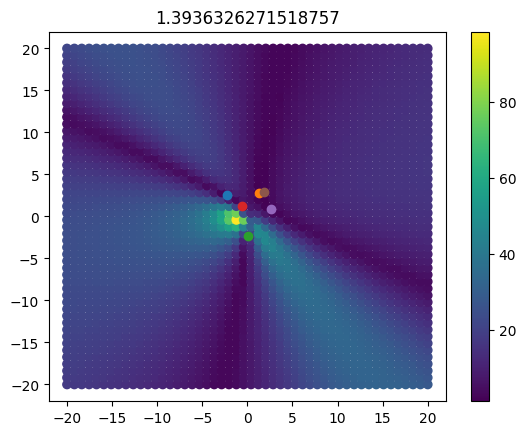

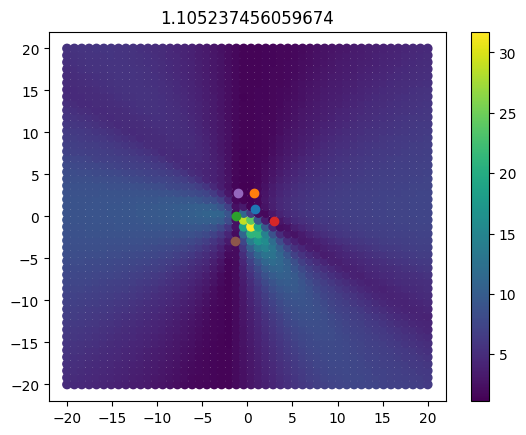

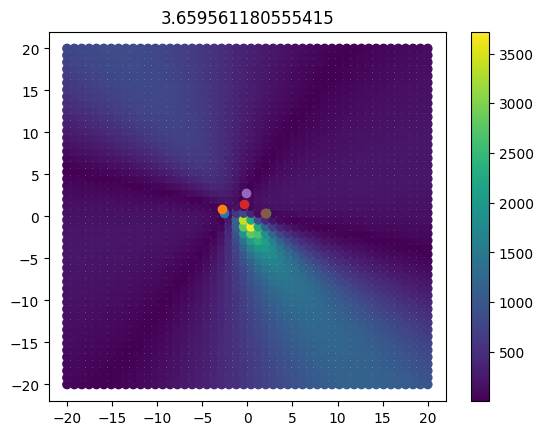

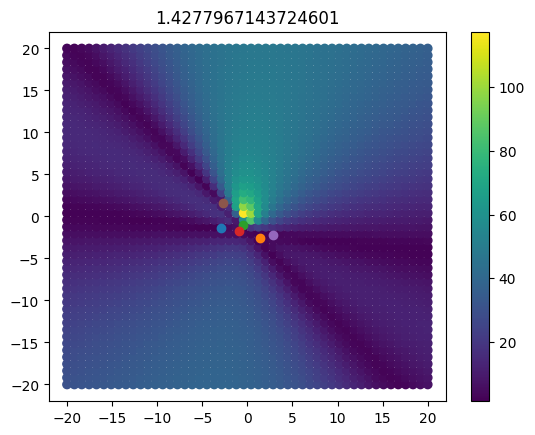

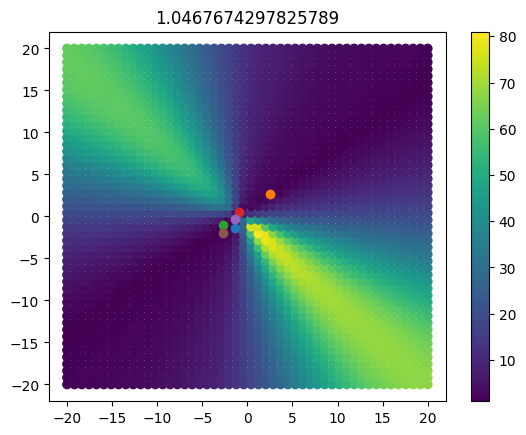

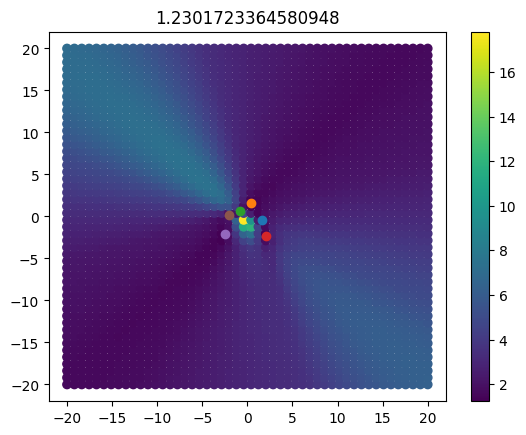

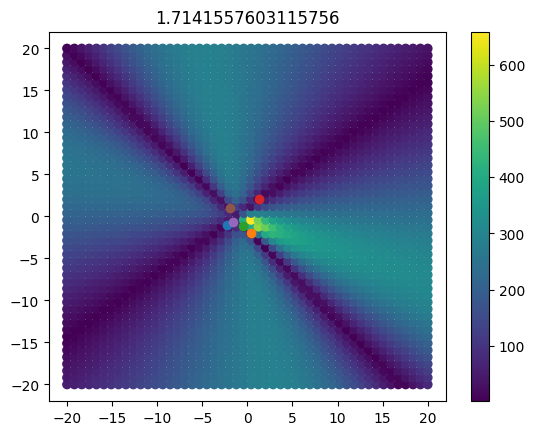

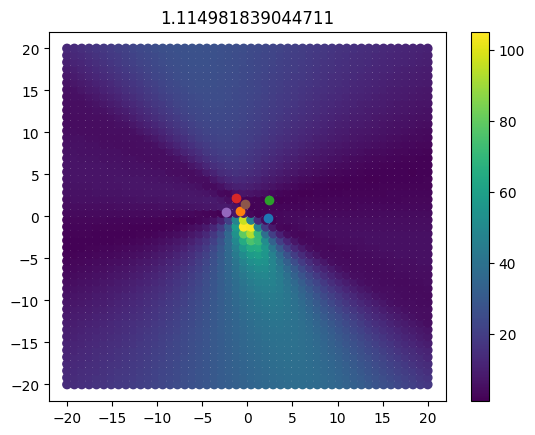

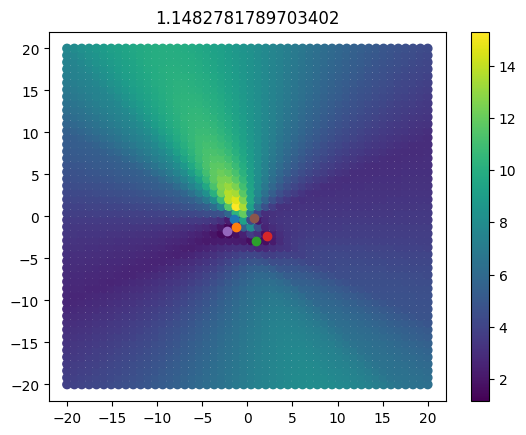

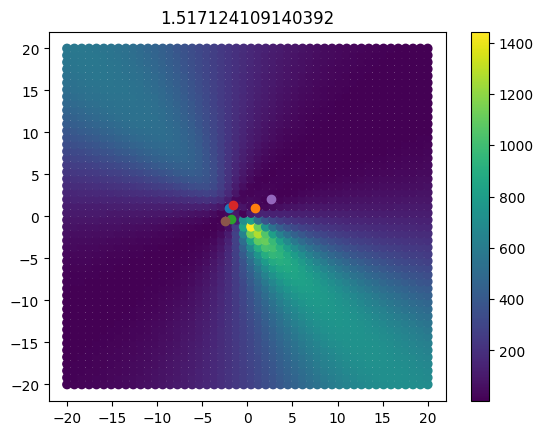

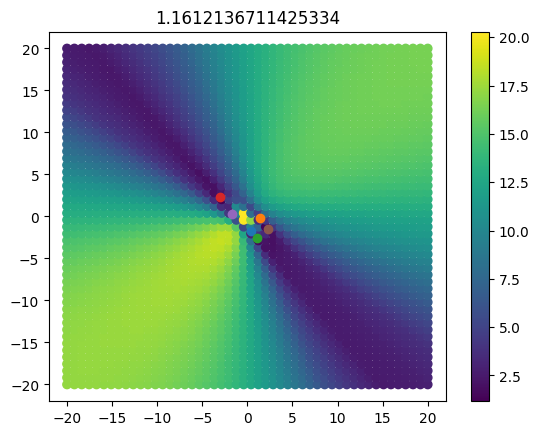

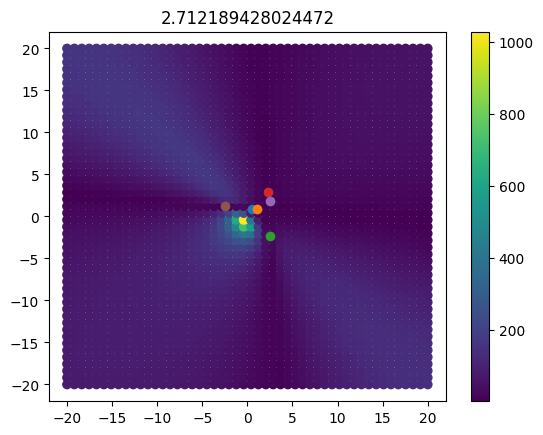

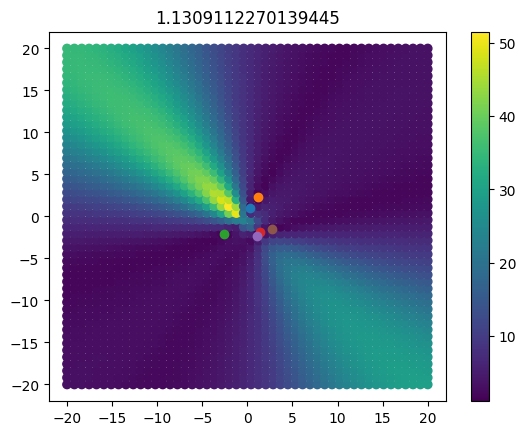

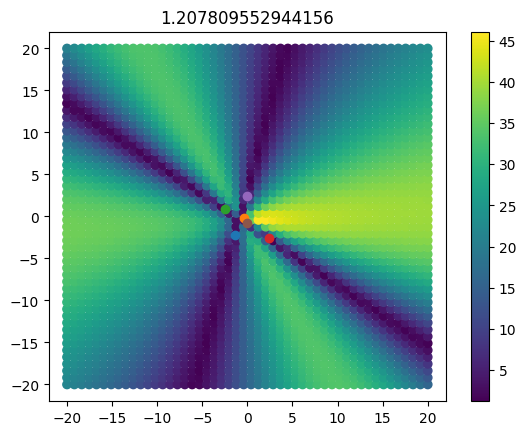

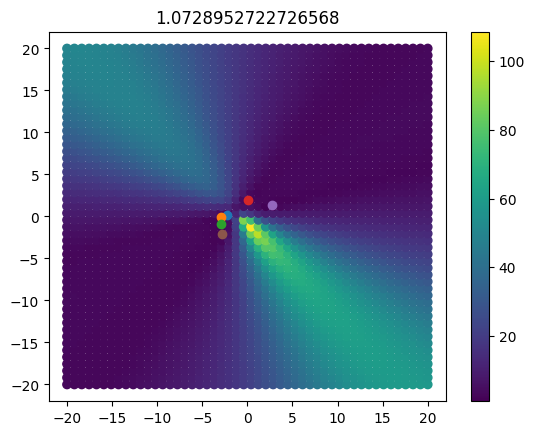

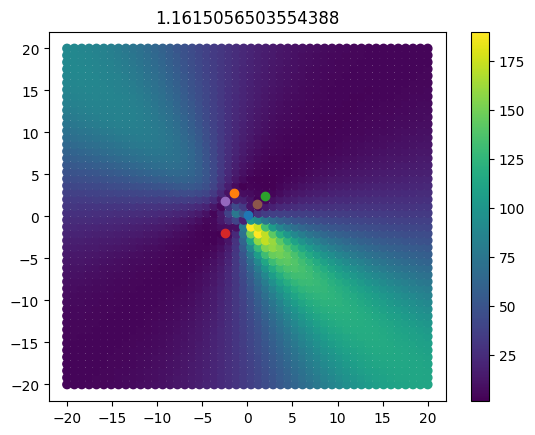

<Figure size 640x480 with 0 Axes>

In [162]:
for j in range(20):
    ls = np.linspace(-20,20,50)
    theta_mesh = np.vstack(np.meshgrid(ls,ls)).reshape(2,-1).T
    basis = np.random.uniform(-3,3,(L,D))
    vals = []
    for elem in theta_mesh:
        vals.append(expression(elem,basis))
    plt.scatter(theta_mesh[:,0],theta_mesh[:,1],c=vals)
    plt.colorbar()
    for elem in basis:
        plt.scatter(elem[0],elem[1])
    plt.title(f"{np.min(vals)}")
    plt.show()
    plt.clf()

In [75]:
theta_mesh

array([[-30.        , -30.        ],
       [-28.7755102 , -30.        ],
       [-27.55102041, -30.        ],
       ...,
       [ 27.55102041,  30.        ],
       [ 28.7755102 ,  30.        ],
       [ 30.        ,  30.        ]])

In [32]:
a

array([-8.99387108, -6.14891959, -0.74042067,  2.07811925,  8.77381988,
        0.19449005])

In [37]:
a[1:np.shape(a)[0]]

array([-6.14891959, -0.74042067,  2.07811925,  8.77381988,  0.19449005])

In [27]:
expression()

array([1.        , 0.72944462, 0.31238031, 0.53208945, 0.22786414,
       0.09758146])